In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg
from scipy.stats import skew
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from bioinfokit.analys import stat
from pingouin import pairwise_ttests
from statsmodels.graphics.factorplots import interaction_plot


In [2]:
df = pd.read_csv('diabetes (2).csv')
df.columns = df.columns.str.replace(' ', '')
 

In [3]:
# Data Overview
df.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [4]:
# Data Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Data Overview
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
# Detecting Missing Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Detecting Missing Values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# count zeros in column
(df == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

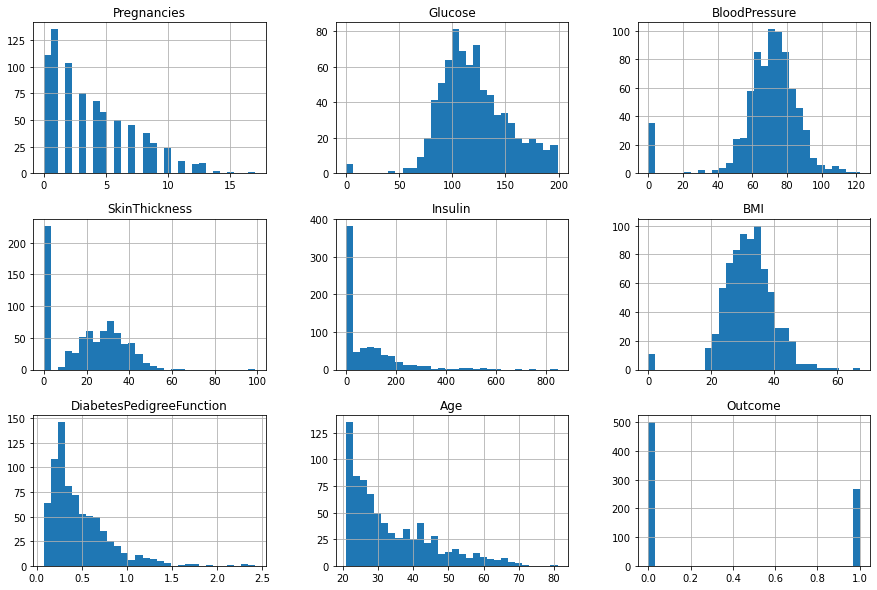

In [9]:
# Data Overview
df.hist(bins=30, figsize=(15, 10))

In [12]:
#Skewness
for col in df.drop('Outcome', axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, df[col].skew()))

Skewness for the column Pregnancies is 0.9016739791518588
Skewness for the column Glucose is 0.17375350179188992
Skewness for the column BloodPressure is -1.8436079833551302
Skewness for the column SkinThickness is 0.10937249648187608
Skewness for the column Insulin is 2.272250858431574
Skewness for the column BMI is -0.42898158845356543
Skewness for the column DiabetesPedigreeFunction is 1.919911066307204
Skewness for the column Age is 1.1295967011444805


<AxesSubplot:title={'center':'Age'}, xlabel='Outcome'>

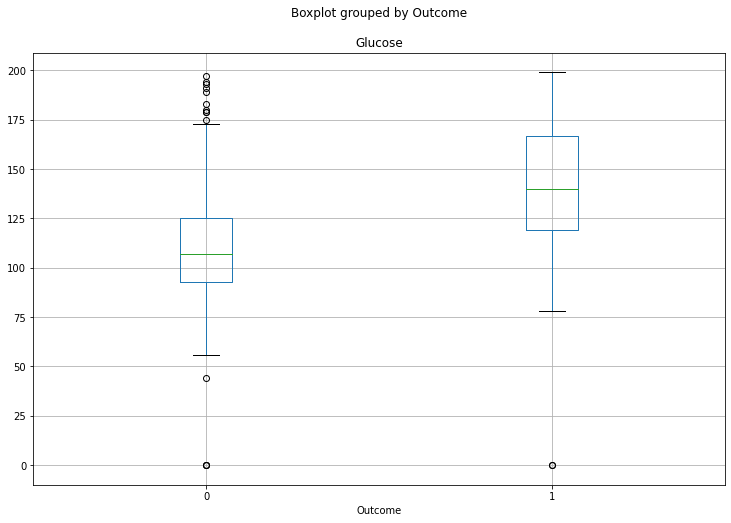

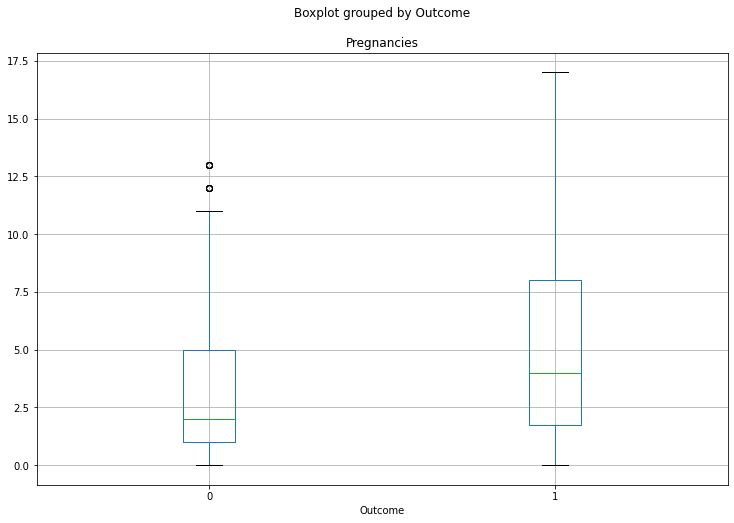

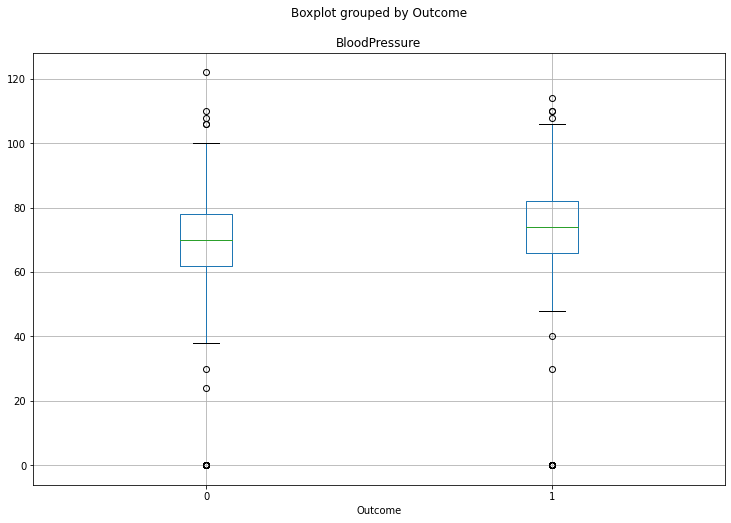

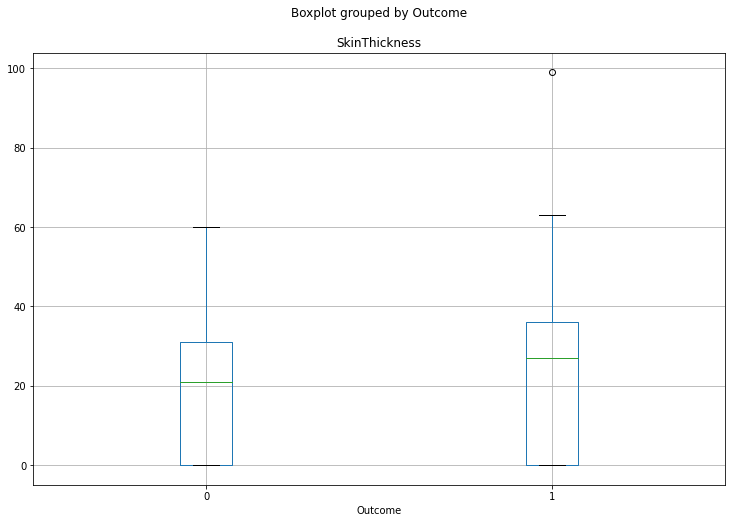

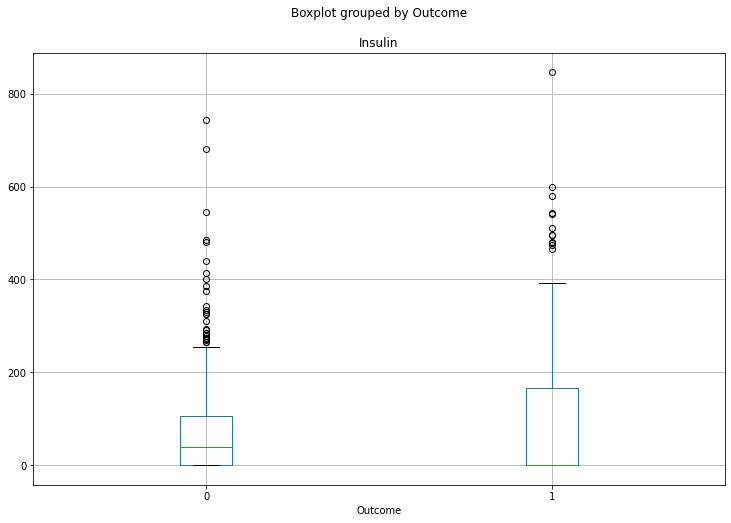

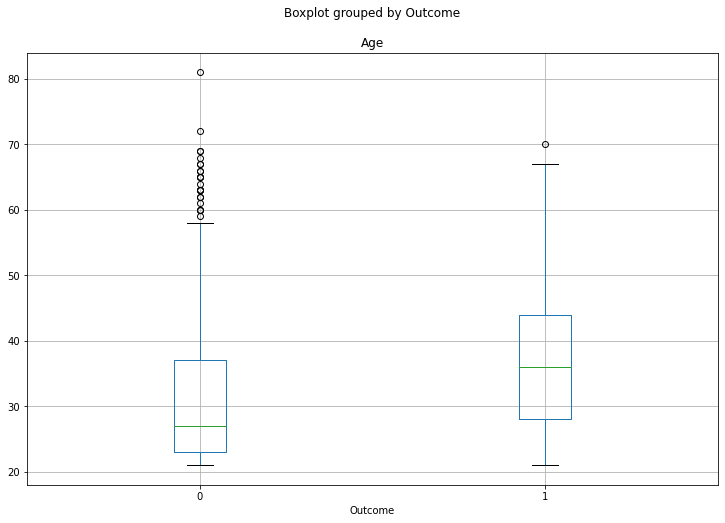

In [13]:
df.boxplot('Glucose', by='Outcome', figsize=(12, 8))
df.boxplot('Pregnancies', by='Outcome', figsize=(12, 8))
df.boxplot('BloodPressure', by='Outcome', figsize=(12, 8))
df.boxplot('SkinThickness', by='Outcome', figsize=(12, 8))
df.boxplot('Insulin', by='Outcome', figsize=(12, 8))
df.boxplot('BMI', by='Outcome', figsize=(12, 8))
df.boxplot('DiabetesPedigreeFunction', by='Outcome', figsize=(12, 8))
df.boxplot('Age', by='Outcome', figsize=(12, 8))


In [14]:
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.NaN)

In [15]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [16]:
#Skewness
for col in df.drop('Outcome', axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, df[col].skew()))

Skewness for the column Pregnancies is 0.9016739791518588
Skewness for the column Glucose is 0.5327186599872982
Skewness for the column BloodPressure is 0.1418850201030565
Skewness for the column SkinThickness is 0.8376083316006523
Skewness for the column Insulin is 3.380019128212173
Skewness for the column BMI is 0.599232520287425
Skewness for the column DiabetesPedigreeFunction is 1.919911066307204
Skewness for the column Age is 1.1295967011444805


In [17]:
 # count zeros in column
(df == 0).sum(axis=0)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [127]:
# Data Overview
df.hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>],
       [<AxesSubplot:title={'center':'Age_group'}>,
        <AxesSubplot:title={'center':'BloodPressure_level'}>,
        <AxesSubplot:>]], dtype=object)

In [20]:
df_diabetic = df[df.Outcome==1]
df_non_diabetic = df[df.Outcome==0]

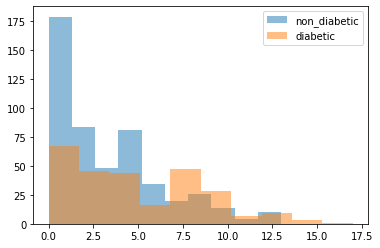

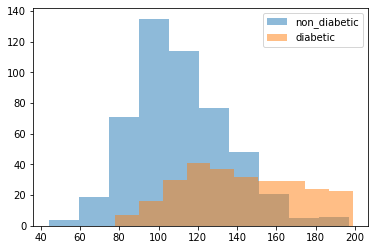

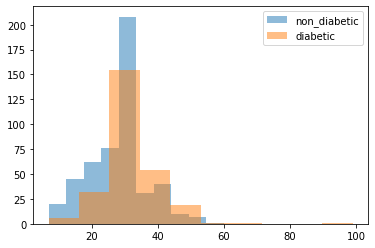

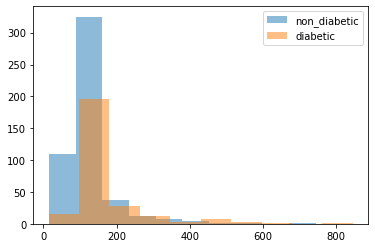

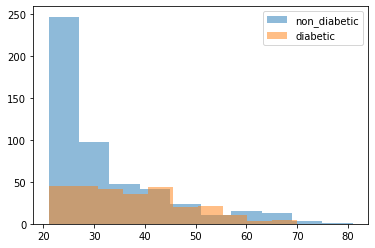

In [21]:
# Pregnancies
plt.hist(df_non_diabetic['Pregnancies'], alpha=0.5, label='non_diabetic')
  
plt.hist(df_diabetic['Pregnancies'], alpha=0.5, label='diabetic')
plt.legend()  

plt.show()

# Glucose
plt.hist(df_non_diabetic['Glucose'], alpha=0.5, label='non_diabetic')
  
plt.hist(df_diabetic['Glucose'], alpha=0.5, label='diabetic')
plt.legend() 

plt.show()

# BloodPressure
plt.hist(df_non_diabetic['BloodPressure'], alpha=0.5, label='non_diabetic')
  
plt.hist(df_diabetic['BloodPressure'], alpha=0.5, label='diabetic')
plt.legend() 

plt.show()

# SkinThickness
plt.hist(df_non_diabetic['SkinThickness'], alpha=0.5, label='non_diabetic')
  
plt.hist(df_diabetic['SkinThickness'], alpha=0.5, label='diabetic')
plt.legend() 

plt.show()

# Insulin
plt.hist(df_non_diabetic['Insulin'], alpha=0.5, label='non_diabetic')
  
plt.hist(df_diabetic['Insulin'], alpha=0.5, label='diabetic')
plt.legend() 

plt.show()

# BMI
plt.hist(df_non_diabetic['BMI'], alpha=0.5, label='non_diabetic')
  
plt.hist(df_diabetic['BMI'], alpha=0.5, label='diabetic')
plt.legend() 

plt.show()

# DiabetesPedigreeFunction
plt.hist(df_non_diabetic['DiabetesPedigreeFunction'], alpha=0.5, label='non_diabetic')
  
plt.hist(df_diabetic['DiabetesPedigreeFunction'], alpha=0.5, label='diabetic')
plt.legend() 

plt.show()

# Age
plt.hist(df_non_diabetic['Age'], alpha=0.5, label='non_diabetic')
  
plt.hist(df_diabetic['Age'], alpha=0.5, label='diabetic')
plt.legend() 

plt.show()


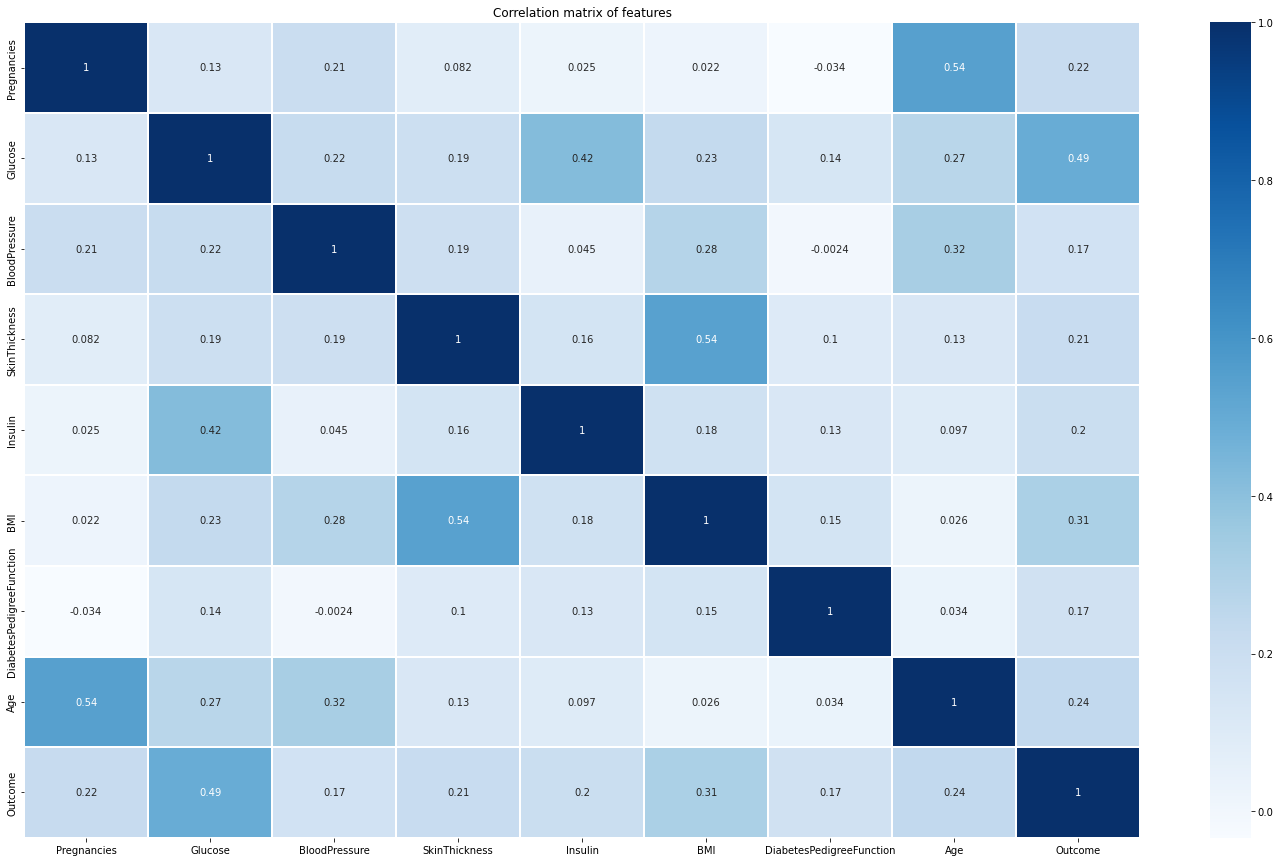

In [22]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, cmap = "Blues", linewidth = 0.30)
plt.title("Correlation matrix of features")
plt.show()

# Two Sample T-test

In [23]:
df.groupby('Outcome').describe()['Glucose'].transpose().loc[['mean','std'],:]


Outcome           0           1
mean     110.710121  142.165573
std       24.717060   29.541750

In [24]:
Glucose_non_diabetic = df.query('Outcome == 0')['Glucose']
Glucose_diabetic = df.query('Outcome == 1')['Glucose']

In [25]:
# Population here is all Diabetic and Non-Diabetic Patients
# Parameter of Interest is (μ1 − μ2 ): Glucose
# μ1: Mean Glucose of Diabetic Patients
# μ2: Mean Glucose Non-Diabetic Patients

# Check the Assumptions of the Two-Sample T-test
# Normality of Data
print(stats.shapiro(Glucose_non_diabetic))
 
print(stats.shapiro(Glucose_diabetic))

ShapiroResult(statistic=0.9751472473144531, pvalue=1.658014383565387e-07)
ShapiroResult(statistic=0.9740050435066223, pvalue=8.39184649521485e-05)


In [26]:
# Checking the Homogeneity of Variances
stats.levene(Glucose_non_diabetic, Glucose_diabetic)

LeveneResult(statistic=23.533387363010853, pvalue=1.4875339982247185e-06)

In [27]:
res = pg.ttest(Glucose_diabetic, Glucose_non_diabetic, correction=False)
display(res)

T  dof alternative         p-val           CI95%   cohen-d  \
T-test  15.679898  766   two-sided  2.909252e-48  [27.52, 35.39]  1.187057   

             BF10  power  
T-test  5.179e+44    1.0

In [28]:
BMI_non_diabetic = df.query('Outcome == 0')['BMI']
BMI_diabetic = df.query('Outcome == 1')['BMI']
 

In [29]:
df.groupby('Outcome').describe()['BMI'].transpose().loc[['mean','std'],:]

Outcome          0          1
mean     30.885600  35.383582
std       6.504128   6.595603

In [30]:
# Parameter of Interest is (μ1 − μ2 ): BMI
# μ1: Mean BMI of Diabetic Patients
# μ2: Mean BMI Non-Diabetic Patients

# Check the Assumptions of the Two-Sample T-test
# Normality of Data
print(stats.shapiro(BMI_non_diabetic))
 
print(stats.shapiro(BMI_diabetic))

ShapiroResult(statistic=0.9818791747093201, pvalue=6.959207894396968e-06)
ShapiroResult(statistic=0.9483104348182678, pvalue=3.986539098832509e-08)


In [31]:
# Checking the Homogeneity of Variances
stats.levene(BMI_non_diabetic, BMI_diabetic)

LeveneResult(statistic=1.3668461604500781, pvalue=0.2427181790711925)

In [32]:
res = pg.ttest(BMI_diabetic, BMI_non_diabetic, correction=True)
display(res)

T         dof alternative         p-val         CI95%  \
T-test  9.051747  539.458262   two-sided  2.552896e-18  [3.52, 5.47]   

         cohen-d       BF10  power  
T-test  0.688169  3.728e+15    1.0

In [33]:
Age_non_diabetic = df.query('Outcome == 0')['Age']
Age_diabetic = df.query('Outcome == 1')['Age']

In [34]:
df.groupby('Outcome').describe()['Age'].transpose().loc[['mean','std'],:]

Outcome          0          1
mean     31.190000  37.067164
std      11.667655  10.968254

In [35]:
# Parameter of Interest is (μ1 − μ2 ): Age
# μ1: Mean Age of Diabetic Patients
# μ2: Mean Age Non-Diabetic Patients

# Check the Assumptions of the Two-Sample T-test
# Normality of Data
print(stats.shapiro(Age_non_diabetic))
 
print(stats.shapiro(Age_diabetic))

ShapiroResult(statistic=0.8011691570281982, pvalue=2.6708481417438164e-24)
ShapiroResult(statistic=0.9545705914497375, pvalue=2.0275294332350313e-07)


In [36]:
# Checking the Homogeneity of Variances
stats.levene(Age_non_diabetic, Age_diabetic)

LeveneResult(statistic=2.225209723504269, pvalue=0.13618591982127692)

In [37]:
res = pg.ttest(Age_diabetic, Age_non_diabetic, correction=True)
display(res)

T         dof alternative         p-val         CI95%  \
T-test  6.920738  575.777275   two-sided  1.201513e-11  [4.21, 7.55]   

         cohen-d       BF10  power  
T-test  0.514245  6.987e+08    1.0

In [38]:
from scipy.stats import ttest_ind
stat, pvalue = ttest_ind(Age_diabetic, Age_non_diabetic)

# Multiple Linear Regression

In [34]:
#df.hist(column = 'Insulin')

In [35]:
#df['Insulin'] = np.log(df['Insulin'])

In [36]:
#df['Insulin'].skew()

In [37]:
#df.hist(column = 'Insulin')

In [40]:
X1 = df[['Pregnancies', 'Insulin', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']]
y1 = df['Glucose']

In [41]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [42]:
regressor = LinearRegression()
res = regressor.fit(X1_train, y1_train)

In [43]:
coeff_df = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])
coeff_df

Coefficient
Pregnancies                 -0.533576
Insulin                      0.111043
BloodPressure                0.260413
SkinThickness               -0.021233
BMI                          0.232846
DiabetesPedigreeFunction     0.346438
Age                          0.422194
Outcome                     23.268390

In [44]:
y1_pred = regressor.predict(X1_test)


In [45]:
pre = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
pre

Actual   Predicted
661   199.0  134.632870
122   107.0  105.723785
113    76.0  105.262001
14    166.0  145.501019
529   111.0  108.615147
..      ...         ...
476   105.0  143.003862
482    85.0   95.723211
230   142.0  135.930181
527   116.0  104.683441
380   107.0  103.652453

[154 rows x 2 columns]

In [46]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Mean Absolute Error: 19.448112133082695
Mean Squared Error: 653.9003826467138
Root Mean Squared Error: 25.571475957533497


In [47]:
X2 = sm.add_constant(X1_train)
est = sm.OLS(y1_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     49.16
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           4.66e-61
Time:                        18:20:47   Log-Likelihood:                -2810.7
No. Observations:                 614   AIC:                             5639.
Df Residuals:                     605   BIC:                             5679.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [48]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

# One-way ANOVA

In [49]:
df["Age_group"] = df["Age"]

In [50]:
df.loc[(df.Age <= 30), 'Age_group'] = 0


In [51]:
df.loc[(df.Age > 30) & (df.Age < 60), 'Age_group'] = 1


In [52]:
df.loc[(df.Age >= 60), 'Age_group'] = 2


In [53]:
df.hist(column = 'Age_group')

array([[<AxesSubplot:title={'center':'Age_group'}>]], dtype=object)

In [54]:
df["BloodPressure_level"] = df["BloodPressure"]

In [55]:
df.loc[(df.BloodPressure <= 80), 'BloodPressure_level'] = 0

In [56]:
df.loc[(df.BloodPressure > 80) & (df.Age < 90), 'BloodPressure_level'] = 1

In [57]:
df.loc[(df.BloodPressure >= 90), 'BloodPressure_level'] = 2
df["BloodPressure_level"]=df["BloodPressure_level"].astype(int)

In [58]:
df.hist(column = 'BloodPressure_level')

array([[<AxesSubplot:title={'center':'BloodPressure_level'}>]],
      dtype=object)

In [59]:
from statsmodels.formula.api import ols

mod1 = ols('Glucose ~ Age_group',
                data=df).fit()
                
aov_table1 = sm.stats.anova_lm(mod1, typ=2)
print(aov_table1)

                  sum_sq     df          F        PR(>F)
Age_group   42470.815138    1.0  48.698843  6.466543e-12
Residual   668037.321166  766.0        NaN           NaN


In [67]:
#NORMALITY
stats.shapiro(mod1.resid)


ShapiroResult(statistic=0.9783200025558472, pvalue=2.9775857335323508e-09)

In [90]:
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize= (10, 10))
ax1 = fig.add_subplot(111)

normality_plot1, stat1 = stats.probplot(mod1.resid, plot= plt, rvalue= True)
ax1.set_title("Probability plot of model residual's", fontsize= 20)
ax1.set

plt.show()

In [81]:
#check whether all samples have the same variance
test_statistic, p_value = stats.bartlett(df['Glucose'], df['Age_group'])
  
print(test_statistic, p_value)

5015.203534134364 0.0


In [106]:
posthocs1 = pairwise_ttests(dv='Glucose', between='Age_group', padjust='bonf', data=df, correction=False)
posthocs1

Contrast  A  B  Paired  Parametric         T    dof alternative  \
0  Age_group  0  1   False        True -6.227266  734.0   two-sided   
1  Age_group  0  2   False        True -4.623832  447.0   two-sided   
2  Age_group  1  2   False        True -1.595679  349.0   two-sided   

          p-unc        p-corr p-adjust       BF10    hedges  
0  7.986034e-10  2.395810e-09     bonf  9.692e+06 -0.462731  
1  4.938439e-06  1.481532e-05     bonf   3084.853 -0.846745  
2  1.114656e-01  3.343968e-01     bonf      0.619 -0.295253

In [107]:
#pairwise comparisons
pt1 = pg.pairwise_tukey(dv='Glucose', between='Age_group', effsize = 'cohen', data=df)
print(pt1)

   A  B     mean(A)    mean(B)       diff        se         T       p-tukey  \
0  0  1  115.050504  128.70023 -13.649726  2.197490 -6.211509  2.582201e-09   
1  0  2  115.050504  138.25000 -23.199496  5.419154 -4.281018  6.221776e-05   
2  1  2  128.700230  138.25000  -9.549770  5.478158 -1.743245  1.898553e-01   

      cohen  
0 -0.462033  
1 -0.785285  
2 -0.323252  


In [84]:
mod2 = ols('Glucose ~ BloodPressure_level',
                data=df).fit()
                
aov_table2 = sm.stats.anova_lm(mod2, typ=2)
print(aov_table2)

                            sum_sq     df          F        PR(>F)
BloodPressure_level   24793.486164    1.0  27.696375  1.844372e-07
Residual             685714.650140  766.0        NaN           NaN


In [85]:
posthocs2 = pairwise_ttests(dv='Glucose', between='BloodPressure_level', padjust='bonf', data=df, correction=False)
posthocs2

Contrast  A  B  Paired  Parametric         T    dof alternative  \
0  BloodPressure_level  0  1   False        True -3.841790  706.0   two-sided   
1  BloodPressure_level  0  2   False        True -4.144981  661.0   two-sided   
2  BloodPressure_level  1  2   False        True -0.999840  163.0   two-sided   

      p-unc    p-corr p-adjust     BF10    hedges  
0  0.000133  0.000399     bonf  134.527 -0.405822  
1  0.000038  0.000115     bonf  462.388 -0.560469  
2  0.318870  0.956609     bonf    0.276 -0.161063

In [86]:
#pairwise comparisons
pt2 = pg.pairwise_tukey(dv='Glucose', between='BloodPressure_level', effsize = 'cohen', data=df)
print(pt2)

   A  B     mean(A)     mean(B)       diff        se         T   p-tukey  \
0  0  1  118.708845  130.838095 -12.129250  3.163730 -3.833844  0.000401   
1  0  2  118.708845  135.600000 -16.891155  4.050034 -4.170621  0.000100   
2  1  2  130.838095  135.600000  -4.761905  4.841811 -0.983497  0.587527   

      cohen  
0 -0.405413  
1 -0.564577  
2 -0.159164  


In [87]:
#NORMALITY
stats.shapiro(mod2.resid)

ShapiroResult(statistic=0.9717957973480225, pvalue=5.152910043104697e-11)

In [89]:
fig2 = plt.figure(figsize= (10, 10))
ax2 = fig.add_subplot(111)

normality_plot2, stat2 = stats.probplot(mod2.resid, plot= plt, rvalue= True)
ax2.set_title("Probability plot of model residual's", fontsize= 20)
ax2.set

plt.show()

In [91]:
#check whether all samples have the same variance
test_statistic2, p_value2 = stats.bartlett(df['Glucose'], df['BloodPressure_level'])
  
print(test_statistic2, p_value2)

4949.078741633368 0.0


In [93]:
mod3 = ols('Glucose ~ Outcome',
                data=df).fit()
                
aov_table3 = sm.stats.anova_lm(mod3, typ=2)
print(aov_table3)

                 sum_sq     df           F        PR(>F)
Outcome   172637.622487    1.0  245.859209  2.909252e-48
Residual  537870.513817  766.0         NaN           NaN


In [94]:
posthocs3 = pairwise_ttests(dv='Glucose', between='Outcome', padjust='bonf', data=df, correction=False)
posthocs3

Contrast  A  B  Paired  Parametric          T    dof alternative  \
0  Outcome  0  1   False        True -15.679898  766.0   two-sided   

          p-unc       BF10    hedges  
0  2.909252e-48  5.179e+44 -1.185894

In [95]:
#NORMALITY
stats.shapiro(mod3.resid)

ShapiroResult(statistic=0.9876220226287842, pvalue=4.39020550402347e-06)

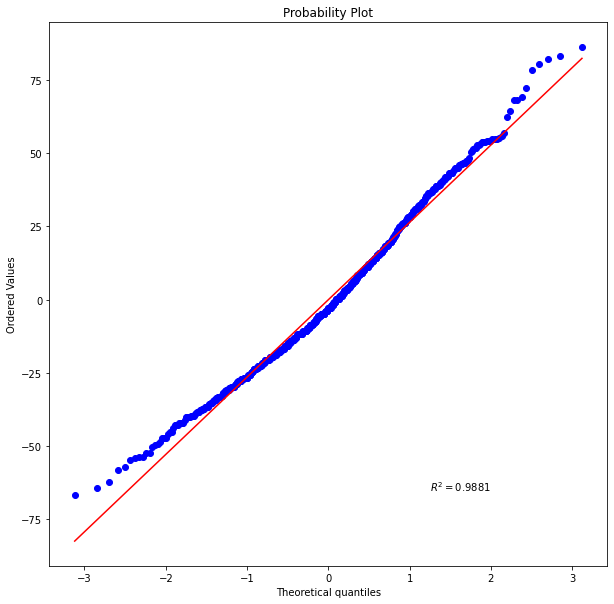

In [96]:
fig3 = plt.figure(figsize= (10, 10))
ax3 = fig.add_subplot(111)

normality_plot3, stat3 = stats.probplot(mod3.resid, plot= plt, rvalue= True)
ax3.set_title("Probability plot of model residual's", fontsize= 20)
ax3.set

plt.show()

In [97]:
#check whether all samples have the same variance
test_statistic3, p_value3 = stats.bartlett(df['Glucose'], df['Outcome'])
  
print(test_statistic3, p_value3)

5308.8786398020975 0.0


# Two-way ANOVA

In [98]:
#doing the 2 way anova with statsmodels
model = ols('Glucose ~ C(Age_group) + C(BloodPressure_level) + C(Age_group):C(BloodPressure_level)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df          F  \
C(Age_group)                          31922.367900    2.0  18.751361   
C(BloodPressure_level)                14843.119431    2.0   8.718924   
C(Age_group):C(BloodPressure_level)    6768.414763    4.0   1.987901   
Residual                             646061.841536  759.0        NaN   

                                           PR(>F)  
C(Age_group)                         1.125090e-08  
C(BloodPressure_level)               1.804108e-04  
C(Age_group):C(BloodPressure_level)  9.452871e-02  
Residual                                      NaN

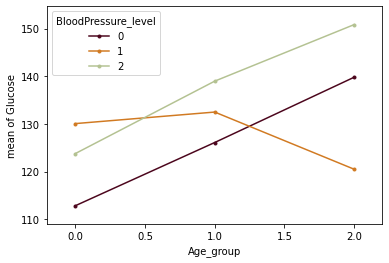

In [99]:
#interaction plot
fig = interaction_plot(x=df['Age_group'], trace=df['BloodPressure_level'], response=df['Glucose'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

In [104]:
#post hoc test for main effect Age_group
res = stat()
res.tukey_hsd(df=df, res_var='Glucose', xfac_var='Age_group', anova_model='Glucose ~ C(Age_group) + C(BloodPressure_level) + C(Age_group):C(BloodPressure_level)')
res.tukey_summary.head() 

group1  group2       Diff      Lower      Upper   q-value   p-value
0       1       0  13.649726   8.553380  18.746072  8.895026  0.001000
1       1       2   9.549770  -3.154994  22.254534  2.496367  0.182226
2       0       2  23.199496  10.631572  35.767419  6.130519  0.001000

In [105]:
#post hoc test for main effect BloodPressure_level

res.tukey_hsd(df=df, res_var='Glucose', xfac_var='BloodPressure_level', anova_model='Glucose ~ C(Age_group) + C(BloodPressure_level) + C(Age_group):C(BloodPressure_level)')
res.tukey_summary.head() 

group1  group2       Diff     Lower      Upper   q-value   p-value
0       0       2  16.891155  7.616327  26.165982  6.048333  0.001000
1       0       1  12.129250  4.884111  19.374388  5.559932  0.001000
2       2       1   4.761905 -6.326143  15.849952  1.426290  0.566842

In [117]:
#interaction effect between Age_group and BloodPressure_level
res = stat()
res.tukey_hsd(df=df, res_var='Glucose', xfac_var=['Age_group','BloodPressure_level'], anova_model='Glucose ~ C(Age_group) + C(BloodPressure_level) + C(Age_group):C(BloodPressure_level)')
res.tukey_summary

group1  group2       Diff      Lower      Upper   q-value   p-value
0   (1, 0)  (1, 2)  12.864375  -3.422042  29.150791  3.474900  0.254856
1   (1, 0)  (1, 1)   6.383381  -7.068467  19.835228  2.087603  0.854254
2   (1, 0)  (0, 0)  13.264541   5.549712  20.979370  7.563889  0.001000
3   (1, 0)  (0, 2)   2.330070 -19.897133  24.557272  0.461172  0.900000
4   (1, 0)  (0, 1)   3.963581 -11.286386  19.213548  1.143400  0.900000
5   (1, 0)  (2, 0)  13.692153  -7.480667  34.864972  2.844934  0.530455
6   (1, 0)  (2, 2)  24.725486 -12.814535  62.265507  2.897541  0.507960
7   (1, 0)  (2, 1)   5.607847 -31.932173  43.147868  0.657175  0.900000
8   (1, 2)  (1, 1)   6.480994 -12.840164  25.802152  1.475665  0.900000
9   (1, 2)  (0, 0)  26.128916  10.258392  41.999441  7.242847  0.001000
10  (1, 2)  (0, 2)  15.194444 -11.004859  41.393748  2.551375  0.655964
11  (1, 2)  (0, 1)   8.900794 -11.712708  29.514295  1.899574  0.900000
12  (1, 2)  (2, 0)   0.827778 -24.483154  26.138709  0.143875  0.900000
13  (1, 2)  (2, 2)  11.861111 -28.158985  51.881208  1.303846  0.900000
14  (1, 2)  (2, 1)  18.472222 -21.547874  58.492319  2.030581  0.878634
15  (1, 1)  (0, 0)  19.647922   6.702715  32.593129  6.677084  0.001000
16  (1, 1)  (0, 2)   8.713450 -15.824445  33.251346  1.562184  0.900000
17  (1, 1)  (0, 1)   2.419799 -16.036128  20.875727  0.576797  0.900000
18  (1, 1)  (2, 0)   7.308772 -16.278260  30.895804  1.363171  0.900000
19  (1, 1)  (2, 2)  18.342105 -20.610596  57.294807  2.071528  0.861130
20  (1, 1)  (2, 1)  11.991228 -26.961473  50.943930  1.354270  0.900000
21  (0, 0)  (0, 2)  10.934472 -10.989823  32.858767  2.194074  0.808732
22  (0, 0)  (0, 1)  17.228122   2.423135  32.033110  5.119282  0.009495
23  (0, 0)  (2, 0)  26.956694   6.102091  47.811297  5.686485  0.002075
24  (0, 0)  (2, 2)  37.990027   0.628558  75.351496  4.473267  0.042841
25  (0, 0)  (2, 1)   7.656694 -29.704775  45.018163  0.901564  0.900000
26  (0, 2)  (0, 1)   6.293651 -19.274251  31.861553  1.082896  0.900000
27  (0, 2)  (2, 0)  16.022222 -13.464121  45.508565  2.390458  0.724768
28  (0, 2)  (2, 2)  27.055556 -15.727727  69.838838  2.782028  0.557348
29  (0, 2)  (2, 1)   3.277778 -39.505505  46.061061  0.337042  0.900000
30  (0, 1)  (2, 0)   9.728571 -14.928220  34.385363  1.735768  0.900000
31  (0, 1)  (2, 2)  20.761905 -18.847718  60.371528  2.305928  0.760909
32  (0, 1)  (2, 1)   9.571429 -30.038195  49.181052  1.063054  0.900000
33  (2, 0)  (2, 2)  11.033333 -31.211774  53.278440  1.148972  0.900000
34  (2, 0)  (2, 1)  19.300000 -22.945107  61.545107  2.009834  0.887506
35  (2, 2)  (2, 1)  30.333333 -22.065273  82.731939  2.546711  0.657960

In [106]:
#NORMALITY
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9805370569229126, pvalue=1.3977896173855697e-08)

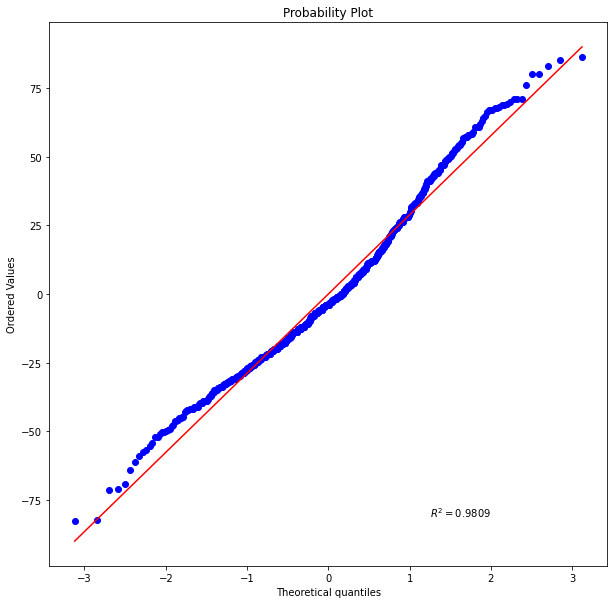

In [107]:
fig4 = plt.figure(figsize= (10, 10))
ax4 = fig.add_subplot(111)

normality_plot4, stat4 = stats.probplot(model.resid, plot= plt, rvalue= True)
ax4.set_title("Probability plot of model residual's", fontsize= 20)
ax4.set

plt.show()

In [108]:
#check whether all samples have the same variance
test_statistic4, p_value4 = stats.bartlett(df['Glucose'], df['Age_group'], df['BloodPressure_level'])
  
print(test_statistic4, p_value4)

9564.481543145988 0.0
